<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/M%C3%A9todo_de_m%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de mínimos cuadrados**

$$\frac{d^2 u}{d x^2} + u = x$$

$$u(0) =0,  u'(0) = 2$$

Resolviendo por el método

$$u_N = \alpha_0 + \alpha_1 x + \alpha_2  x^2  + \alpha_3  x^3 + ⋅⋅⋅  $$

Usar el método de mínimos cuadrados para encontrar una solución aproximada.

In [282]:
#Importamos librerías
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Analíticamente:

In [283]:
x = sp.Symbol('x') #Introducimos una variable
u = sp.Function('u') #Esto es una función

In [284]:
x

x

In [285]:
u

u

Para resolver la ecuación

$$\frac{d^2 u}{d x^2} + u - x = 0$$

In [286]:
#Introducimos la ecuación diferencial ordinaria
ode = u(x).diff(x,x) + u(x) - x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [287]:
sol = sp.dsolve(ode, ics = {u(0): 0, u(x).diff(x).subs(x,0): 2})
#ics es un diccionario

In [288]:
sol

Eq(u(x), x + sin(x))

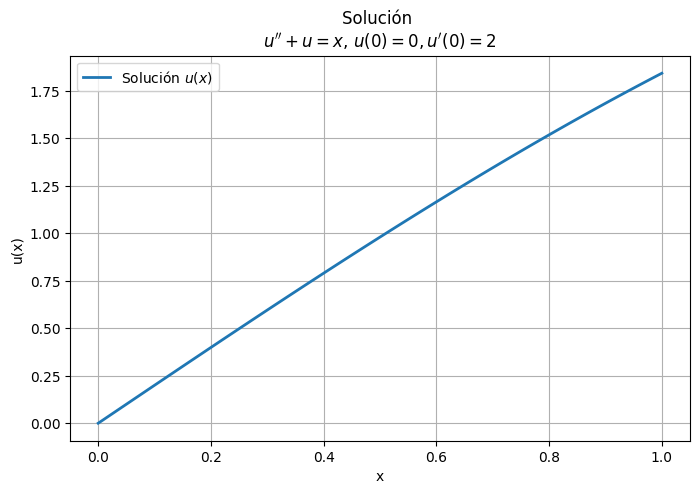

In [289]:
#Convertimos en un arreglo de numpy
U_exp = sol.rhs

u_num = sp.lambdify(x, U_exp, "numpy") #Cambiar a una función

xx = np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy, label = 'Solución $u(x)$', linewidth = 2)
plt.title("Solución \n$u'' + u = x$, $u(0) = 0, u'(0) = 2$")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Ahora con las funciones de prueba

$$u_N = 2x + \alpha_2 x^2 + \alpha_3 x^3$$

In [290]:
a, b = sp.symbols('a b')

#Función de prueba u_n(x) que cumple u(0) = 0, u'(0) = 2
#Sustituir los valores de alpha_0 y alpha_1
u_n = 2*x + a*x**2 + b*x**3

In [291]:
u_n #Imprimir el valor de u_n

a*x**2 + b*x**3 + 2*x

In [292]:
u_n_2 = sp.diff(u_n, x, 2) #deriva respecto a x, dos veces

E = u_n_2 + u_n - x

$$E = F(u_N) - f(x) = \frac{d^2 u_N}{dx^2} + u_n - x$$

In [293]:
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [294]:
I = sp.integrate(E**2, (x,0,1))

In [295]:
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [296]:
dIa = sp.diff(I,a)
dIb = sp.diff(I,b)

In [297]:
print(dIa, "\n", dIb)

166*a/15 + 49*b/3 + 5/2 
 49*a/3 + 1018*b/35 + 22/5


In [298]:
soleq = sp.solve([dIa, dIb], [a,b], simplify = True)

In [299]:
soleq

{a: -1335/86789, b: -24759/173578}

In [300]:
#Sustituir en la función de prueba

u_approx = u_n.subs(soleq) #tenía antes u_approx = E.subs(soleq)

In [301]:
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [302]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

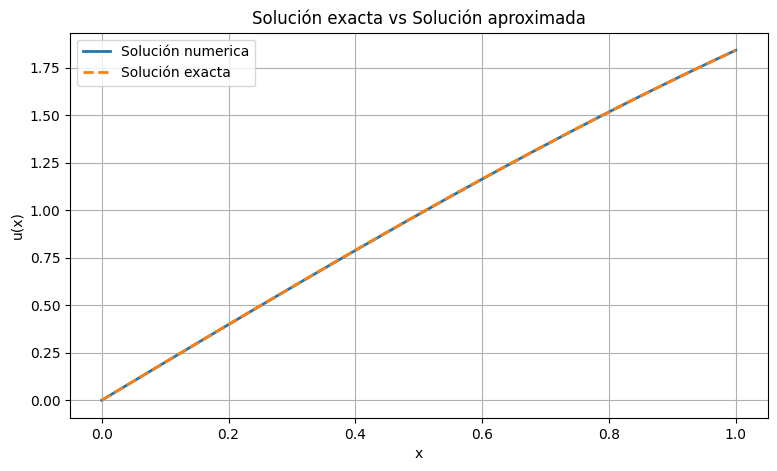

In [303]:
xx = np.linspace(0,1,100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label=f'Solución numerica', linewidth=2)
plt.plot(xx, yy,"--" ,label=f'Solución exacta', linewidth=2)
plt.title('Solución exacta vs Solución aproximada')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

**Obtención del error de la solución exacta y de la numérica**

In [304]:
#Obtención del error

#sol es la exacta
print(sol)

#Para poder utilizarla la ponemos de nuevo
exacta = sol.rhs
exacta

Eq(u(x), x + sin(x))


x + sin(x)

In [305]:
aproximacion = u_approx

error = exacta - aproximacion
error #error de la aproximación numérica

24759*x**3/173578 + 1335*x**2/86789 - x + sin(x)

In [306]:
error_fn = sp.lambdify(x, error, "numpy")

max_error = np.max(np.abs(error_fn(xx)))

print("El error máximo de Mínimos Cuadrados es:", max_error)

El error máximo de Mínimos Cuadrados es: 0.0011009713885305472


**Comparar con el ejercicio 5.1 (método de colocación)**

Añadir los valores obtenidos en el método de colocación.

In [307]:
#Añadimos los valores de a y b
ucol = 2*x - sp.Rational(1, 17)*x**2 - sp.Rational(2, 17)*x**3

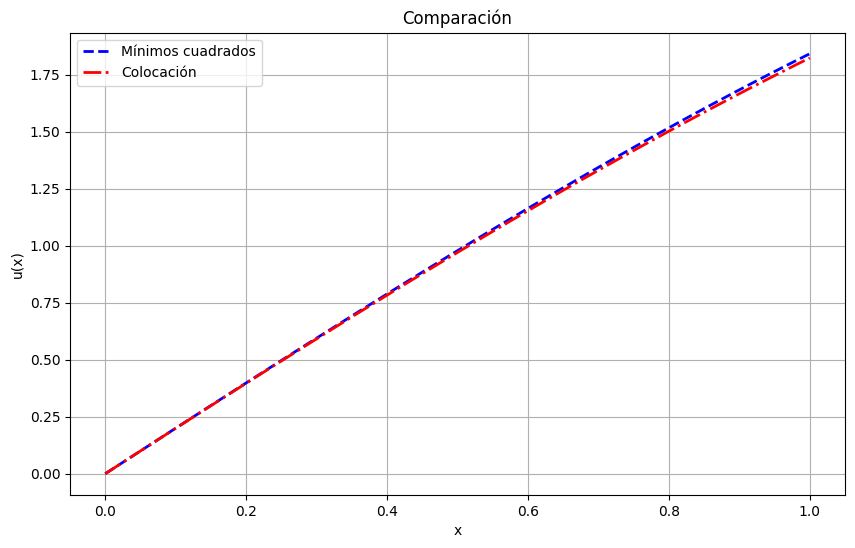

In [308]:
ucol_fn = sp.lambdify(x, ucol, "numpy")

plt.figure(figsize=(10,6))
plt.plot(xx, u_approx_fn(xx), 'b--', linewidth=2, label='Mínimos cuadrados')
plt.plot(xx, ucol_fn(xx), 'r-.', linewidth=2, label='Colocación')
plt.title('Comparación')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()